## Let's have some fun with live image classification using TeachableMachine by Google

### Head over to this Website: https://teachablemachine.withgoogle.com/train

# Playground

https://playground.tensorflow.org/

# Artificial Neural Network

[colab_link](https://colab.research.google.com/drive/1v8o8v7V_V4G6UpaybuWSawC6m0H4Xbgf?usp=sharing)

In [9]:
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras import utils

In [2]:
iris_data = datasets.load_iris(as_frame=True)
x = iris_data.data
y = iris_data.target

In [3]:
df = pd.DataFrame(
    iris_data.data, 
    columns=iris_data.feature_names
    )

df['target'] = iris_data.target

# Map targets to target names
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}

df['target_names'] = df['target'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
from sklearn.model_selection import train_test_split


train, temp = train_test_split(df, test_size=0.7)

In [12]:
test, val = train_test_split(temp, test_size=0.5)

In [13]:
x_train, y_train = train.values[:, :4], train.values[:,4]
x_val, y_val = val.values[:, :4], val.values[:,4]
x_test, y_test = test.values[:, :4], test.values[:,4]

In [14]:
y_train = utils.to_categorical(y_train, num_classes=3)
y_val = utils.to_categorical(y_val, num_classes=3)
y_test = utils.to_categorical(y_test, num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)
print("Shape of y_val",y_val.shape)

Shape of y_train (45, 3)
Shape of y_test (52, 3)
Shape of y_val (53, 3)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-Layer-1 (Dense)       (None, 128)               640       
_________________________________________________________________
Hidden-Layer-2 (Dense)       (None, 128)               16512     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_train = np.asarray(x_train).astype(np.float32)
x_train = np.asarray(y_train).astype(np.float32)
x_val = np.asarray(x_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [19]:
epochs = 30
batch_size = 16


In [25]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 

In [22]:


iris_data = load_iris() # load the iris dataset


x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [32]:

# Split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)


In [33]:
optimizer = Adam(lr=0.001)


# Build the model

model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='FC1'))
model.add(Dense(10, activation='relu', name='FC3'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history = model.fit(x_train, y_train, validation_split=0.1, verbose=2, batch_size=8, epochs=30)

# Test on unseen data

results = model.evaluate(x_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC1 (Dense)                  (None, 10)                50        
_________________________________________________________________
FC3 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
14/14 - 0s - loss: 1.0562 - accuracy: 0.5463 - val_loss: 1.0656 - val_accuracy: 0.4167
Epoch 2/30
14/14 - 0s - loss: 1.0299 - accuracy: 0.3148 - val_loss: 1.0665 - val_accuracy: 0.3333
Epoch 3/30
14/14 - 0s - loss: 1.0026 - accuracy: 0.4630 - val_loss: 1.0590 - val_accuracy: 0.2500
Epoch 4/30
14/14 - 0s - loss: 0.9624 - accuracy: 0.6852 

In [35]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

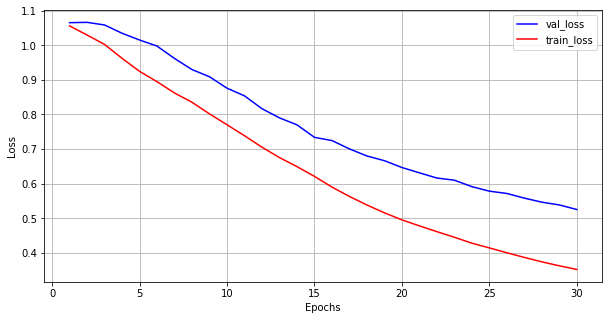

In [36]:
plt.figure(figsize=(10,5))
plt.plot([*range(1, epochs+1)], val_loss, label="val_loss", color="b")
plt.plot([*range(1, epochs+1)], train_loss, label="train_loss", color="r")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

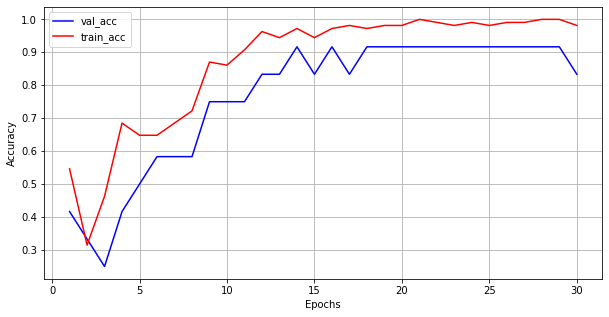

In [37]:
plt.figure(figsize=(10,5))
plt.plot([*range(1, epochs+1)], val_acc, label="val_acc", color="b")
plt.plot([*range(1, epochs+1)], train_acc, label="train_acc", color="r")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [39]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_test = np.argmax(y_test, axis=1)


In [40]:
from sklearn.metrics import classification_report



target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred , target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        13
     class 1       0.62      0.83      0.71         6
     class 2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.84      0.85      0.84        30
weighted avg       0.88      0.87      0.87        30



In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)

In [73]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Setosa", "Versicolor", "Virginica"])

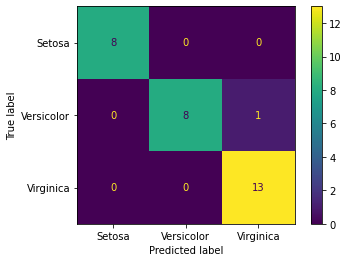

In [74]:
disp.plot()

plt.show()

### --> Question: What is difference between model parameter and hyperparameter?

# Hand-written Digits MNIST Dataset

Visualisation:
https://adamharley.com/nn_vis/cnn/2d.html

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers

## Loading Dataset

In [79]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

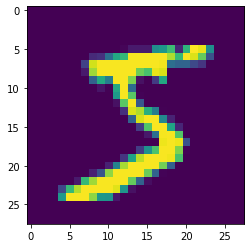

In [80]:
plt.imshow(x_train[0])
plt.show()

In [81]:
y_train[0]

5

In [82]:
print("Train")
unique_values, counts = np.unique(y_train, return_counts=True)
for unique_value, count in zip(unique_values, counts):
    print(unique_value,"--", count)

Train
0 -- 5923
1 -- 6742
2 -- 5958
3 -- 6131
4 -- 5842
5 -- 5421
6 -- 5918
7 -- 6265
8 -- 5851
9 -- 5949


In [83]:
print("Test")
unique_values, counts = np.unique(y_test, return_counts=True)
for unique_value, count in zip(unique_values, counts):
    print(unique_value,"--", count)

Test
0 -- 980
1 -- 1135
2 -- 1032
3 -- 1010
4 -- 982
5 -- 892
6 -- 958
7 -- 1028
8 -- 974
9 -- 1009


## Dataset Preparation

In [73]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

In [ ]:
num_classes = 10

In [84]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model Preparation

In [ ]:

input_shape = (28, 28, 1)

In [89]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)              

### Convolution

Visulisation:

https://ezyang.github.io/convolution-visualizer/

In [90]:
batch_size = 128
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, validation_split=0.1, batch_size=batch_size, epochs=epochs)

Epoch 1/30


ValueError: in user code:

    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/abhi/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 28, 28]


In [ ]:

results = model.evaluate(x_test, y_test)

print('Final test se t loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

In [ ]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([*range(1, epochs+1)], val_loss, label="val_loss", color="b")
plt.plot([*range(1, epochs+1)], train_loss, label="train_loss", color="r")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([*range(1, epochs+1)], val_acc, label="val_acc", color="b")
plt.plot([*range(1, epochs+1)], train_acc, label="train_acc", color="r")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_test = np.argmax(y_test, axis=1)


In [ ]:
from sklearn.metrics import classification_report



target_names = [ str(i) for i in range(0,10)]
print(classification_report(y_test, y_pred , target_names=target_names))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

In [ ]:
disp.plot()

plt.show()

### Various optimizer's convergence

In [1]:
from IPython.display import Image

Image(url='images/optimizers.gif')
